In [539]:
import pandas as pd
import random as rnd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline


In [540]:
df = pd.read_csv('../datasets/weather/jp_weather.csv',decimal=",")
df = df.drop('Value', axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=["Date"])
df['Celsius'] = pd.to_numeric(df['Celsius'])
df['Celsius'] = df['Celsius'].round(2)


In [541]:
#saving latitude and longitude to a list of dictionary
stations = df['Station'].unique()
Positions = []
for station in stations:
    #display(station ,df[df['Station'] == station][['LAT']][:1].values[0][0])
    Positions.append({'loc':[df[df['Station'] == station][['LAT']][:1].values[0][0], df[df['Station'] == station][['LON']][:1].values[0][0]],
                      'station':station})

In [542]:
# Making a map using the folium module
import folium
jp_map = folium.Map()

# Adding markers to the map
for position in Positions:
    marker = folium.Marker(location=position['loc'], popup=position['station']+" STATION")
    marker.add_to(jp_map)

# The last object in the cell always gets shown in the notebook
jp_map

In [543]:
# Japan mean temperature 
df.describe()

,Celsius
count,100000.000000
mean,15.402511
std,9.177219
min,-17.390000
25%,8.560000
50%,16.110000
75%,22.940000
max,35.890000


#### Tokyo International Airport

In [544]:
tokyo_intl_df =  df[df['Station']=='TOKYO INTL'] 

tokyo_intl_df.describe()

,Celsius
count,1000.000000
mean,17.345110
std,7.691579
min,1.560000
25%,10.390000
50%,17.280000
75%,23.780000
max,31.610000


Text(0.5, 1.0, 'Tokyo International Airport mean temp')

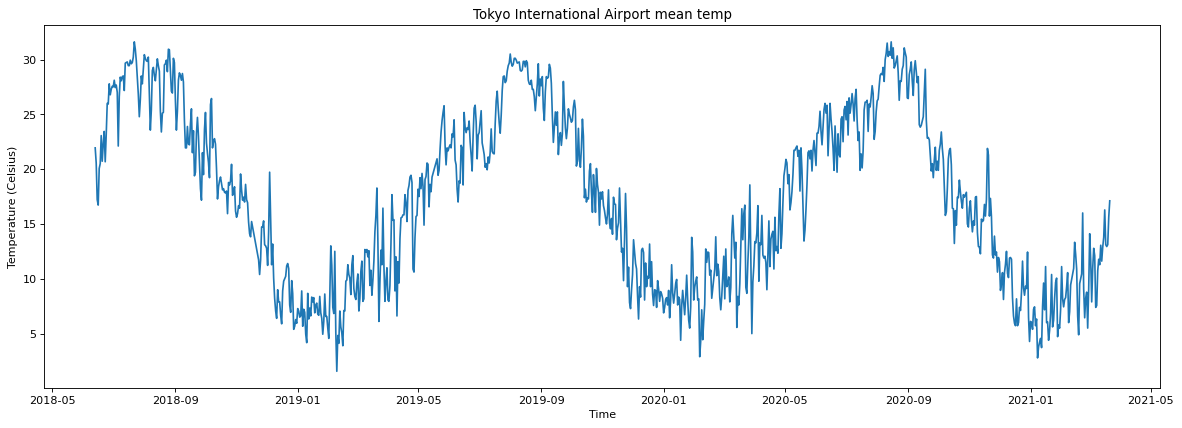

In [545]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tokyo_intl_df['Date'], tokyo_intl_df['Celsius'])
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Tokyo International Airport mean temp')

In [546]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(tokyo_intl_df['Celsius'])
print(results)
print('p-value: ' + str(results[1]))

# H0: the series is non-stationary (there's strong seasonality within)
if (results[1] > 0.05):
    print("Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure")
else:
    print('Reject H0, series is stationary')

(-1.9286550796246564, 0.31870322499477444, 18, 981, {'1%': -3.4370334797663844, '5%': -2.8644907213150725, '10%': -2.568341114581742}, 4178.2575176931205)
p-value: 0.31870322499477444
Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure


In [547]:
from statsmodels.tsa.stattools import adfuller
def adf_test(val):
    results = adfuller(val)
    print(results)
    print('p-value: ' + str(results[1]))

    # H0: the series is non-stationary (there's strong seasonality within)
    if (results[1] > 0.05):
        print("Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure")
    else:
        print('Reject H0, series is stationary')



In [548]:
tokyo_intl_df.index = pd.to_datetime(tokyo_intl_df['Date'])
tokyo_intl_df = tokyo_intl_df.drop("Date", axis = 1)
tokyo_intl_2020_df = tokyo_intl_df.loc['2020']
#x = tokyo_intl_2020_df['Celsius'] #2020 data only
y = tokyo_intl_2020_df['Celsius']

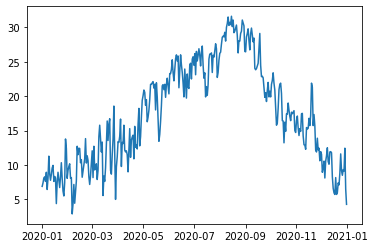

In [549]:
plt.plot(y)

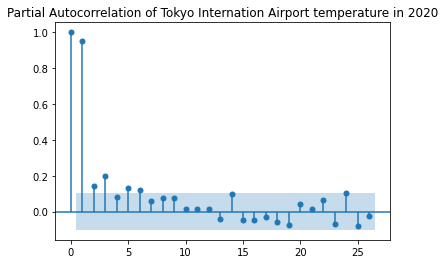

In [550]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
#y = np.random.rand(100)
plot_pacf(y)
plt.title("Partial Autocorrelation of Tokyo Internation Airport temperature in 2020")
pyplot.show()

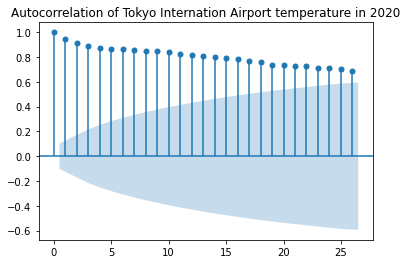

In [551]:
plot_acf(y)
plt.title("Autocorrelation of Tokyo Internation Airport temperature in 2020")
plt.show()

In [552]:
from statsmodels.tsa.stattools import adfuller
def adf_test(val):
    results = adfuller(val)
    print(results)
    print('p-value: ' + str(results[1]))

    # H0: the series is non-stationary (there's strong seasonality within)
    if (results[1] > 0.05):
        print("Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure")
    else:
        print('Reject H0, series is stationary')

adf_test(y)

(-1.2953432355470307, 0.6313000869415504, 5, 360, {'1%': -3.448645946352023, '5%': -2.869602139060357, '10%': -2.5710650077160495}, 1519.4879633386686)
p-value: 0.6313000869415504
Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure


(-9.744024294929025, 8.348344933930587e-17, 7, 357, {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}, 1514.7743420322436)
p-value: 8.348344933930587e-17
Reject H0, series is stationary


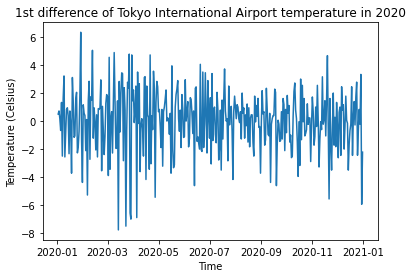

In [553]:
y_diff = y.diff(1)
y_diff = y_diff.dropna()
plt.plot(y_diff)
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title("1st difference of Tokyo International Airport temperature in 2020")
adf_test(y_diff)

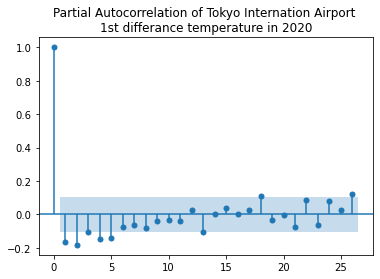

In [554]:
plot_pacf(y_diff)
plt.title("Partial Autocorrelation of Tokyo Internation Airport \n1st differance temperature in 2020")
pyplot.show()

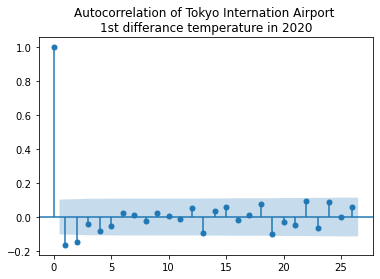

In [555]:
plot_acf(y_diff)
plt.title("Autocorrelation of Tokyo Internation Airport \n1st differance temperature in 2020")
pyplot.show()

In [556]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(y, lags=5, trend='n')
results = model.fit()

C:\Users\maidu\.conda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\maidu\.conda\envs\tf\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [557]:
y

Date
2020-01-01     6.89
2020-01-02     7.39
2020-01-03     8.11
2020-01-04     8.28
2020-01-05     7.61
              ...  
2020-12-27     9.33
2020-12-28     9.11
2020-12-29    12.44
2020-12-30     6.50
2020-12-31     4.28
Name: Celsius, Length: 366, dtype: float64

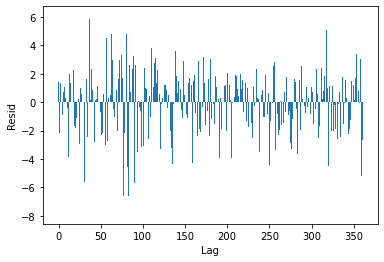

In [558]:
resid = results.resid
plt.bar(range(len(resid)), resid)
plt.xlabel('Lag')
plt.ylabel('Resid')
plt.show()

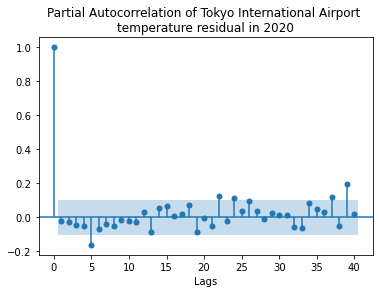

In [559]:
plot_pacf(resid, lags = 40)
plt.xlabel('Lags')
plt.title('Partial Autocorrelation of Tokyo International Airport \ntemperature residual in 2020')
plt.show()

C:\Users\maidu\.conda\envs\tf\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


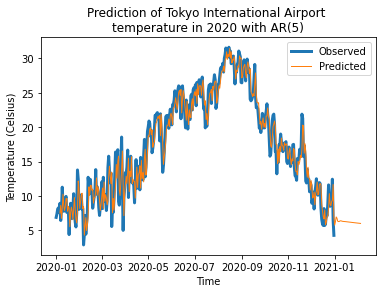

In [560]:
y_pred = results.predict(end=400)
plt.plot(y, label='Observed', linewidth=3)
plt.plot(y_pred, label='Predicted', linewidth=1)

plt.title('Prediction of Tokyo International Airport \ntemperature in 2020 with AR(5)')
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

In [561]:
print(results.summary())


                            AutoReg Model Results                             
Dep. Variable:                Celsius   No. Observations:                  366
Model:                     AutoReg(5)   Log Likelihood                -783.708
Method:               Conditional MLE   S.D. of innovations              2.121
Date:                Sat, 15 May 2021   AIC                              1.537
Time:                        01:07:44   BIC                              1.602
Sample:                    01-06-2020   HQIC                             1.563
                         - 12-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Celsius.L1     0.7660      0.052     14.682      0.000       0.664       0.868
Celsius.L2    -0.0071      0.066     -0.107      0.914      -0.137       0.122
Celsius.L3     0.0993      0.067      1.493      0.1

In [562]:
from statsmodels.regression.linear_model import yule_walker
rho, sigma = yule_walker(y, 5, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')


rho: [-0.77147734  0.02958253 -0.12995926  0.02257913 -0.12027447]
sigma: 2.2614593848973557


#### Predicting Tokyo international airport in 2021 with all previous data

In [563]:

df_tokyo_all = df[df['Station']=='TOKYO INTL']
df_tokyo_all.index = pd.to_datetime(df_tokyo_all['Date'])
df_tokyo_all = df_tokyo_all.loc[:,['Date','Celsius']]
tokyo_all_temp = df_tokyo_all['Celsius'] #June 13rd 2018 to March 21st 2021 
y = tokyo_all_temp

In [564]:
adf_test(y)

(-1.9286550796246564, 0.31870322499477444, 18, 981, {'1%': -3.4370334797663844, '5%': -2.8644907213150725, '10%': -2.568341114581742}, 4178.2575176931205)
p-value: 0.31870322499477444
Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure


Text(0.5, 1.0, 'Tokyo International Airport mean temp from \nJune 13rd 2018 to March 21st 2021 ')

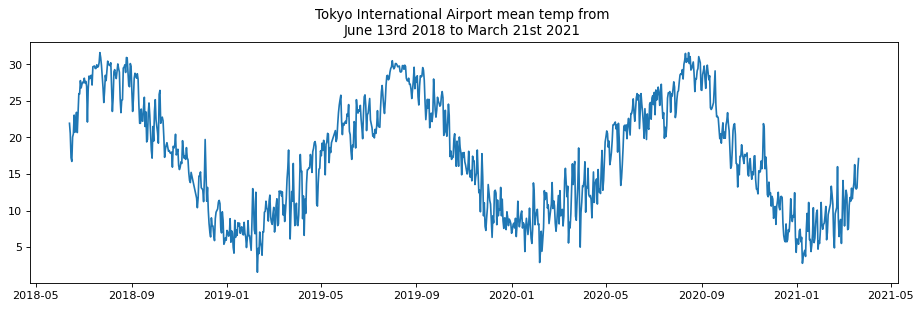

In [565]:
from matplotlib.pyplot import figure
figure(figsize=(14, 4), dpi=80)

plt.plot(y)
plt.title("Tokyo International Airport mean temp from \nJune 13rd 2018 to March 21st 2021 ")

(-7.9320730060784985, 3.4914894135101044e-12, 17, 981, {'1%': -3.4370334797663844, '5%': -2.8644907213150725, '10%': -2.568341114581742}, 4169.973875895288)
p-value: 3.4914894135101044e-12
Reject H0, series is stationary


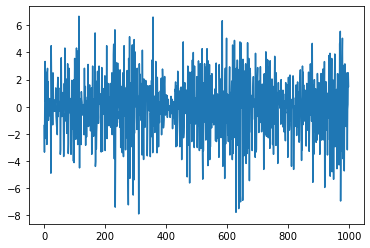

In [566]:
#taking 1st difference
tokyo_all_temp_1st_diff = tokyo_all_temp.diff(1)
tokyo_all_temp_1st_diff = tokyo_all_temp_1st_diff.dropna()
adf_test(tokyo_all_temp_1st_diff)
plt.plot(range(0,len(tokyo_all_temp_1st_diff)),tokyo_all_temp_1st_diff)

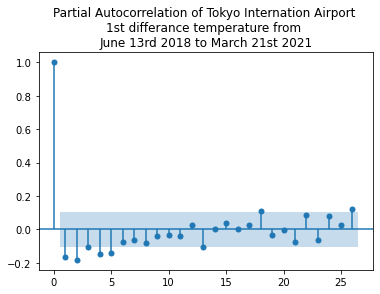

In [567]:
plot_pacf(y_diff)
plt.title("Partial Autocorrelation of Tokyo Internation Airport \n1st differance temperature from \nJune 13rd 2018 to March 21st 2021")
pyplot.show()

In [568]:
y = y.reset_index()
y = y['Celsius']

In [569]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(y, lags=5, trend='n',seasonal=True, period=365) #1 year period
results = model.fit()

C:\Users\maidu\.conda\envs\tf\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


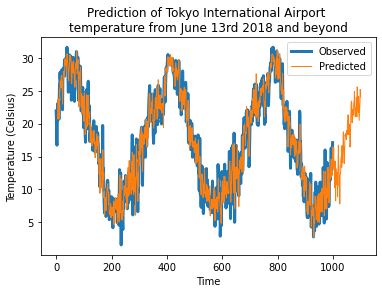

In [570]:
y_pred = results.predict(end=1100)
plt.plot(y, label='Observed', linewidth=3)
plt.plot(y_pred, label='Predicted', linewidth=1)

plt.title('Prediction of Tokyo International Airport \ntemperature from June 13rd 2018 and beyond')
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

In [571]:
y_pred

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1096    21.525000
1097    22.250000
1098    23.335000
1099    25.195000
1100    24.089998
Length: 1101, dtype: float64